# 1. 处理鉴别器训练数据

In [8]:
import os
import random
from Bio import SeqIO

family_list = ['PF00959', 'PF01832', 'PF05838', 'PF06737','PF16754']

In [9]:
def get_sequences_from_fasta(fasta_path):
    sequences = []
    with open(fasta_path, 'r') as file:
        for record in SeqIO.parse(file, 'fasta'):
            sequence = str(record.seq)
            sequences.append(sequence)
    return sequences


def get_sequences_from_txt(file_path):
    sequences = []
    with open(file_path, 'r') as txt:
        for line in txt:
            # 使用逗号分割每一行，提取序列部分
            parts = line.strip().split(',')
            if len(parts) >= 1:
                sequence = parts[0]
                sequences.append(sequence)
    return sequences
    

def write_sequences_to_file(file_path, sequences1, sequences2, label1=0, label2=1):
    # 写入到txt文件中并编码
    with open(file_path, 'w') as txt:
        for sequence in sequences1:
            txt.write(f'{sequence},{label1}\n')
        for sequence in sequences2:
            txt.write(f'{sequence},{label2}\n')
    print("写入成功！")

# 将多个fasta文件合并为一个
def merge_fasta(fasta_file1, fasta_file2, fasta_file3, fasta_file4, fasta_file5, merged_file):
    records1 = list(SeqIO.parse(fasta_file1, 'fasta'))
    print("第一个文件序列数：", len(records1), "条")
    records2 = list(SeqIO.parse(fasta_file2, 'fasta'))
    print("第二个文件序列数：", len(records2), "条")
    records3 = list(SeqIO.parse(fasta_file3, 'fasta'))
    print("第三个文件序列数：", len(records3), "条")
    records4 = list(SeqIO.parse(fasta_file4, 'fasta'))
    print("第四个文件序列数：", len(records4), "条")
    records5 = list(SeqIO.parse(fasta_file5, 'fasta'))
    print("第五个文件序列数：", len(records5), "条")
    records = records1 + records2 + records3 + records4 + records5
    print("合并后的序列数：", len(records), "条")
    with open(merged_file, 'w') as output:
        SeqIO.write(records, output, 'fasta')

def split_txt_file(input_file, output_dir, train_ratio=0.8):
    with open(input_file, 'r') as f:
        lines = f.readlines()
    # 打乱顺序
    random.shuffle(lines)
    # 划分训练集和验证集
    train_size = int(len(lines) * train_ratio)
    train_lines = lines[:train_size]
    val_lines = lines[train_size:]
    # 写入训练集文件
    train_file = os.path.join(output_dir, 'train.txt')
    with open(train_file, 'w') as f:
        f.writelines(train_lines)
    # 写入验证集文件
    val_file = os.path.join(output_dir, 'dev.txt')
    with open(val_file, 'w') as f:
        f.writelines(val_lines)
    print(f"Train set saved to {train_file}")
    print(f"Validation set saved to {val_file}")

合并自然序列

In [3]:
natural_data_dir = "../dataset/filter_dataset/"
fasta_file1 = natural_data_dir + "PF00959_filter.fasta"
fasta_file2 = natural_data_dir + "PF01832_filter.fasta"
fasta_file3 = natural_data_dir + "PF05838_filter.fasta"
fasta_file4 = natural_data_dir + "PF06737_filter.fasta"
fasta_file5 = natural_data_dir + "PF16754_filter.fasta"
merged_file = "train_test/natural_all_family_samples.fasta"
# 将natural_data_dir目录下的所有fasta文件合并为一个文件
merge_fasta(fasta_file1, fasta_file2, fasta_file3, fasta_file4, fasta_file5, merged_file)

第一个文件序列数： 18623 条
第二个文件序列数： 27808 条
第三个文件序列数： 6954 条
第四个文件序列数： 13237 条
第五个文件序列数： 448 条
合并后的序列数： 67070 条


合并人工序列

In [4]:
num_list = [9312, 13904, 3477, 6620, 224]

lora_file_list = ["../pro-gen_generate/data/disc_samples_lora_code_0_1.0.txt",
                "../pro-gen_generate/data/disc_samples_lora_code_1_1.0.txt",
                "../pro-gen_generate/data/disc_samples_lora_code_2_1.0.txt",
                "../pro-gen_generate/data/disc_samples_lora_code_3_1.0.txt",
                "../pro-gen_generate/data/disc_samples_lora_code_4_1.0.txt"]  # 替换为你的文件路径列表
progen_file_list = ["../pro-gen_generate/data/disc_samples_progen_code_0_1.0.txt",
                "../pro-gen_generate/data/disc_samples_progen_code_1_1.0.txt",
                "../pro-gen_generate/data/disc_samples_progen_code_2_1.0.txt",
                "../pro-gen_generate/data/disc_samples_progen_code_3_1.0.txt",
                "../pro-gen_generate/data/disc_samples_progen_code_4_1.0.txt"]  # 替换为你的文件路径列表

# 根据num_list中的数量，从lora_file_list和progen_file_list中随机抽取相应数量的文件
lora_samples = []
progen_samples = []
for i in range(len(num_list)):
    lora_samples += random.sample(get_sequences_from_txt(lora_file_list[i]), num_list[i])
    progen_samples += random.sample(get_sequences_from_txt(progen_file_list[i]), num_list[i])

# 将lora_samples和progen_samples合并到一个list中
all_samples = lora_samples + progen_samples
output_file = 'train_test/artificial_all_family_samples.txt'  # 替换为合并后的文件名
# 输出合并后的文件序列数目
print("合并后的序列数目：", len(all_samples))
# 将合并后的文件写入到output_file中
with open(output_file, 'w') as output_txt:
    for sequence in all_samples:
        output_txt.write(f'{sequence}\n')


合并后的序列数目： 67074


将自然序列和人工序列合并为数据集

In [5]:
family_list = ['PF00959', 'PF01832', 'PF05838', 'PF06737','PF16754']

txt_file = 'train_test/artificial_all_family_samples.txt'  # 第一个文件名
fasta_file = "train_test/natural_all_family_samples.fasta"  # 第二个文件名
output_file = 'train_test/all_sequences_and_labels.txt'  # 输出文本文件名

In [6]:
# 第一个序列为人工序列,label=0
sequences1 = get_sequences_from_txt(txt_file)
# 第二个序列为自然序列,label=1
sequences2 = get_sequences_from_fasta(fasta_file)

write_sequences_to_file(output_file, sequences1, sequences2, label1=0, label2=1)

写入成功！


划分数据集

In [7]:
# 调用函数进行划分
input_file = 'train_test/all_sequences_and_labels.txt'
output_dir = 'train_test'   # 训练集和验证集都会输出在这里
train_ratio = 0.8  # 指定训练集比例
split_txt_file(input_file, output_dir, train_ratio)

Train set saved to train_test/train.txt
Validation set saved to train_test/dev.txt


绘制验证集准确率图像

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# 设置全局字体为times new roman和字体大小
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.size'] = 14

x_font_size = 14
y_font_size = 14
title_font_size = 14
legend_font_size = 14

color_light_blue = '#389cbc'
color_deep_blue = '#2878b5'
color_orange = '#D87C7C'

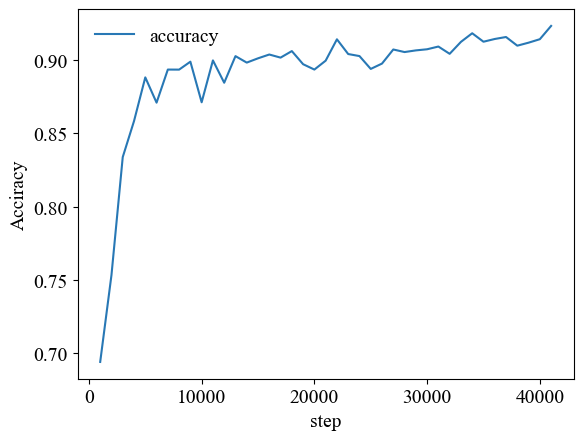

In [5]:
#可视化
import pandas as pd
#读取csv中指定列的数据
data = pd.read_csv('eval_acc.csv')
data_acc = data[['evaluating accuracy']]
# 横坐标为训练步数，从1000开始，到41000
x = range(1000, 42000, 1000)
y2 = np.array(data_acc)
#绘图
plt.plot(x,y2,label="accuracy",color=color_deep_blue)
# plt.title("Evaluating accuracy") 
plt.xlabel('step')
plt.ylabel('Acciracy')
plt.legend(frameon=False)   #显示标签
plt.show()